In [21]:
%load_ext autoreload
%autoreload 2

import pickle as pkl
import pandas as pd
import numpy as np
import os


datapoints = [b.split(".pkl")[0] for b in os.listdir("data/betti_num")]
idxs = [int(s.split("-")[0]) for s in datapoints]
ids = [s.split("-")[1] for s in datapoints]
betti_paths = ["data/betti_num/" + b + ".pkl" for b in datapoints]
original_paths = ["data/atoms/" + b + "_original.npz" for b in datapoints]
enlarged_paths = ["data/atoms/" + b + "_enlarge.npz" for b in datapoints]
feat_topo_compo_paths = ["data/feature_topo_compo/" + b + "_feature.npy" for b in datapoints]

df = pd.DataFrame({
	"idx": idxs,
	"id": ids,
	"betti_path": betti_paths,
	"original_path": original_paths,
	"enlarged_path": enlarged_paths,
	"feat_topo_compo_path": feat_topo_compo_paths
}).sort_values("idx").reset_index(drop=True)

print(len(df))
df.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
21605


,idx,id,betti_path,original_path,enlarged_path,feat_topo_compo_path
0,1,Pr1,data/betti_num/1-Pr1.pkl,data/atoms/1-Pr1_original.npz,data/atoms/1-Pr1_enlarge.npz,data/feature_topo_compo/1-Pr1_feature.npy
1,2,V1,data/betti_num/2-V1.pkl,data/atoms/2-V1_original.npz,data/atoms/2-V1_enlarge.npz,data/feature_topo_compo/2-V1_feature.npy
2,3,Rb1,data/betti_num/3-Rb1.pkl,data/atoms/3-Rb1_original.npz,data/atoms/3-Rb1_enlarge.npz,data/feature_topo_compo/3-Rb1_feature.npy
3,4,Ta1,data/betti_num/4-Ta1.pkl,data/atoms/4-Ta1_original.npz,data/atoms/4-Ta1_enlarge.npz,data/feature_topo_compo/4-Ta1_feature.npy
4,5,V1,data/betti_num/5-V1.pkl,data/atoms/5-V1_original.npz,data/atoms/5-V1_enlarge.npz,data/feature_topo_compo/5-V1_feature.npy


In [22]:
def load_bars(path):
	with open(path, 'rb') as phfile:
		all_pair_outs = pkl.load(phfile)
	return all_pair_outs

def load_unit_cell(path):
	data = np.load(path, allow_pickle=True)
	lattice_vec = data['lattice_vec']
	atom_vec = data['atom_vec']
	cart_atom_vec = np.matmul(atom_vec['pos'], lattice_vec)
	return lattice_vec, atom_vec, cart_atom_vec

def load_enlarged(path):
	data = np.load(path, allow_pickle=True)
	cav = data['CAV']
	cev = data['CEV']
	return cav, cev

def load_feature(path):
	feat = np.load(path)
	return feat

In [23]:
idx = 3015

cell_path = df.iloc[idx]["original_path"]
enlarged_paths = df.iloc[idx]["enlarged_path"]
betti_path = df.iloc[idx]["betti_path"]
feature_path = df.iloc[idx]["feat_topo_compo_path"]

lattice_vec, atom_vec, cart_atom_vec = load_unit_cell(cell_path)
cav, cev = load_enlarged(enlarged_paths)
all_pair_outs = load_bars(betti_path)
feat = load_feature(feature_path)

In [24]:
import plotly.express as px

def draw_unit_cell(atom_vec, cart_atom_vec):
	fig = px.scatter_3d(x=cart_atom_vec[:, 0], y=cart_atom_vec[:, 1], z=cart_atom_vec[:, 2], color=atom_vec['typ'])
	fig.update_layout(scene=dict(
		xaxis_title='X',
		yaxis_title='Y',
		zaxis_title='Z'
	))
	fig.show()

draw_unit_cell(atom_vec, cart_atom_vec)

In [25]:
def draw_enlarged(cev):
	fig = px.scatter_3d(x=cev['pos'][:, 0], y=cev['pos'][:, 1], z=cev['pos'][:, 2], color=cev['typ'])
	fig.update_layout(scene=dict(
		xaxis_title='X',
		yaxis_title='Y',
		zaxis_title='Z'
	))
	fig.show()

draw_enlarged(cev)

Center Type: Ce, Element: Ce


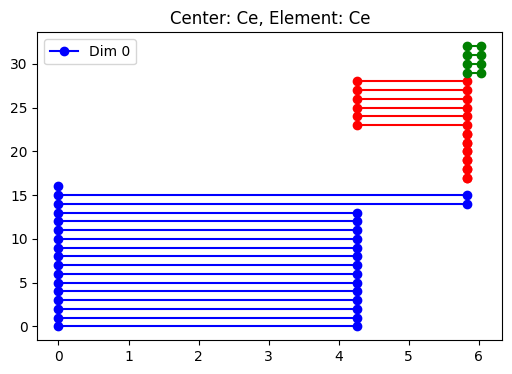

Center Type: Ce, Element: Pd


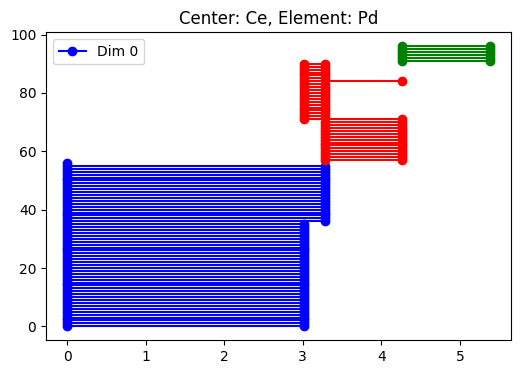

Center Type: Ce, Element: Si


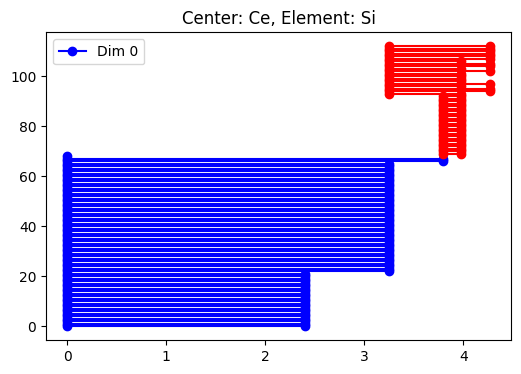

Center Type: Pd, Element: Ce


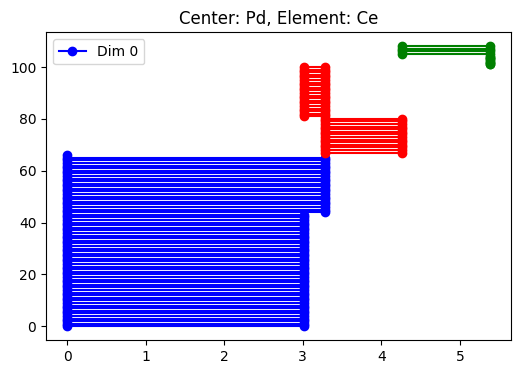

Center Type: Pd, Element: Pd


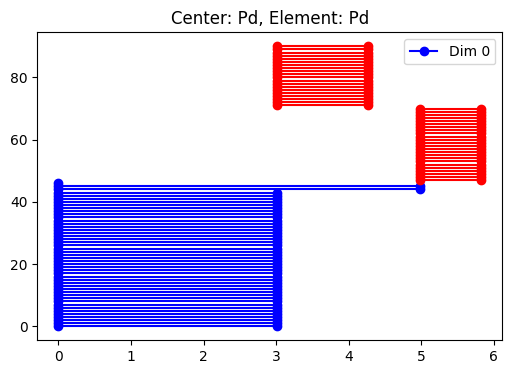

Center Type: Pd, Element: Si


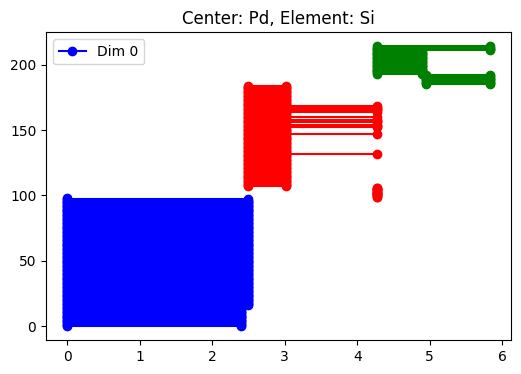

Center Type: Pd, Element: Ce


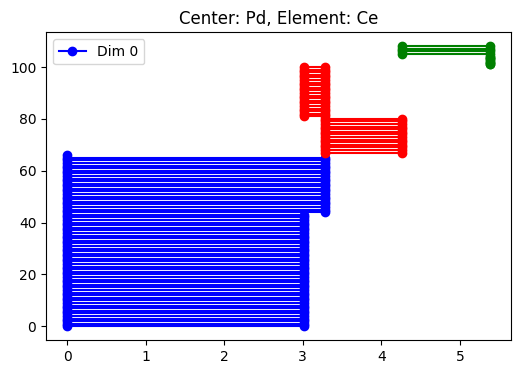

Center Type: Pd, Element: Pd


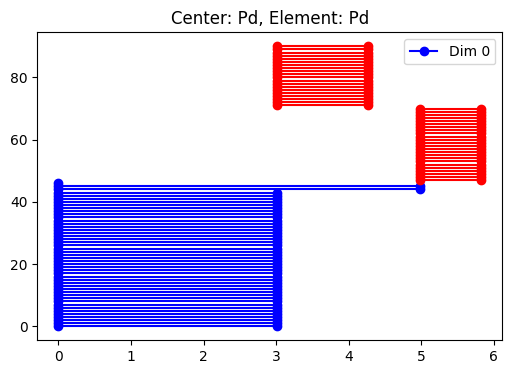

Center Type: Pd, Element: Si


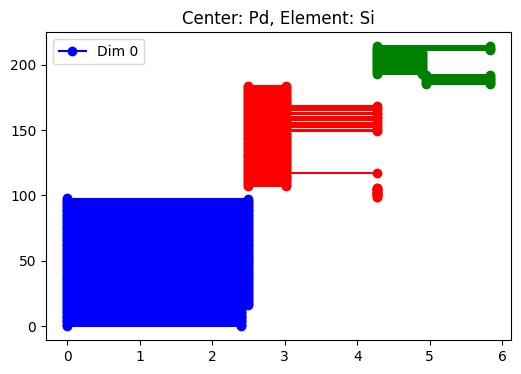

Center Type: Si, Element: Ce


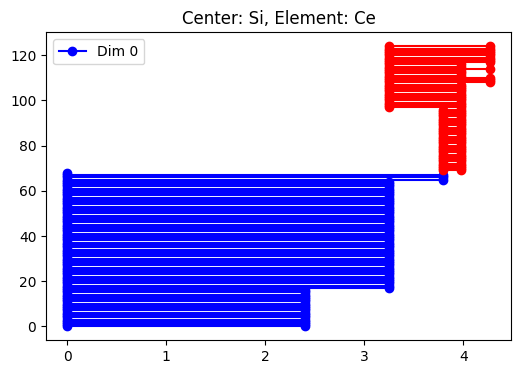

Center Type: Si, Element: Pd


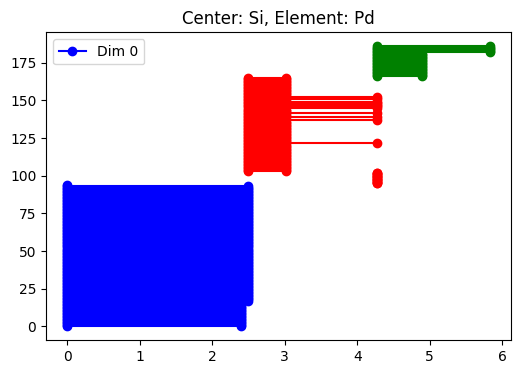

Center Type: Si, Element: Si


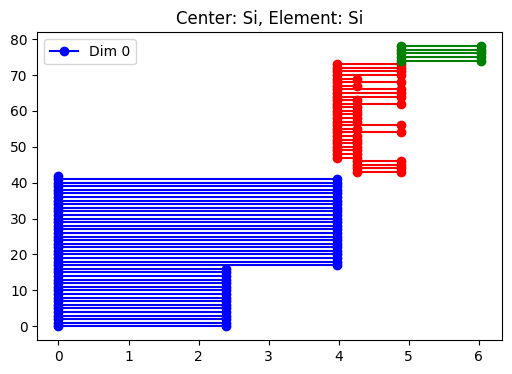

Center Type: Si, Element: Ce


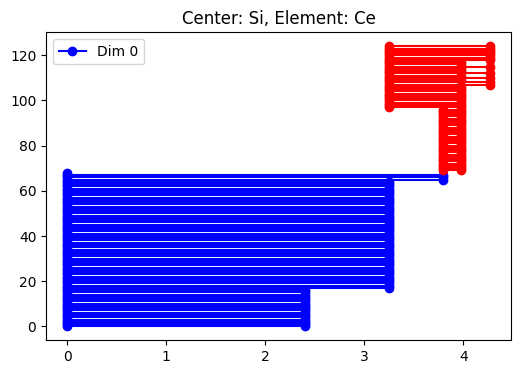

Center Type: Si, Element: Pd


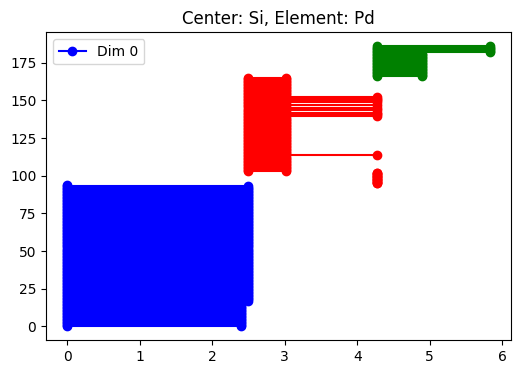

Center Type: Si, Element: Si


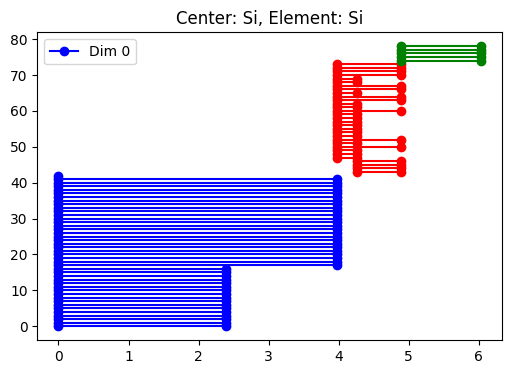

In [ ]:
def plot_barcode(dgms, title):
	import matplotlib.pyplot as plt
	plt.figure(figsize=(6, 4))

	i = 0
	for dim, dgm in enumerate(dgms):
		first = True
		for birth, death in dgm:
			plt.plot([birth, death], [i, i], marker='o', color=["b", "r", "g"][dim], label=f"Dim {dim}" if first else "")
			i += 1
			first = False

	plt.title(title)
	plt.legend()
	plt.show()

for center_type, ele, dgms in all_pair_outs:
	print(f"Center Type: {center_type}, Element: {ele}")
	plot_barcode(dgms, title=f"Center: {center_type}, Element: {ele}")